In [196]:
import pandas as pd
import seaborn as sns
import matplotlib as pyplot
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize
import nltk.stem as stem
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from gensim.models import Word2Vec
import gensim

In [142]:
df = pd.read_csv("Data/Data_Train.csv")
df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


Text variables : Title, sysnopsis

Categorical : Author, genre, bookCategory

composite (categorical) : Edition

real valued: Reviews, ratings

In [143]:
df['Reviews'] = df.Reviews.str.split().str.get(0).astype('float')

In [144]:
df['Ratings'] = df.Ratings.str.split().str.get(0).str.replace(',', '').astype('int32')

In [145]:
df['Edition_type'] = df.Edition.str.split(',').str.get(0)

In [146]:
df['Edition_year'] = df.Edition.str.split().str.get(-1)

In [147]:
df = df.drop(columns=['Edition'])

In [148]:
df.head()

,Title,Author,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Edition_type,Edition_year
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,Paperback,2016
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,Paperback,2012
2,Leviathan (Penguin Classics),Thomas Hobbes,4.8,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00,Paperback,1982
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Paperback,2017
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,Hardcover,2006


In [149]:
df['Genre'].unique().shape

(345,)

In [150]:
df['BookCategory'].unique().shape

(11,)

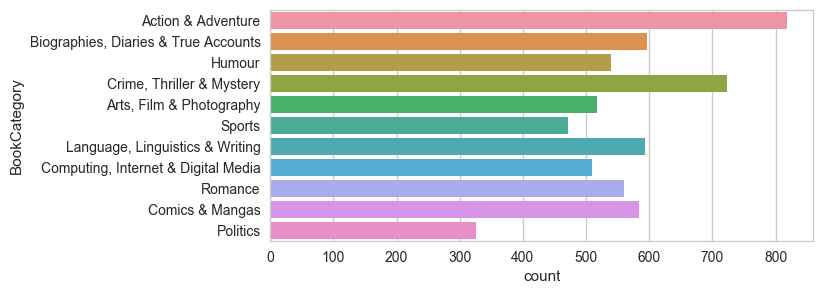

In [152]:
fig, ax = pyplot.pyplot.subplots(figsize=(7,3))
sns.set(style="whitegrid")
sns.countplot(ax=ax, y="BookCategory", data=df)
plt.show()

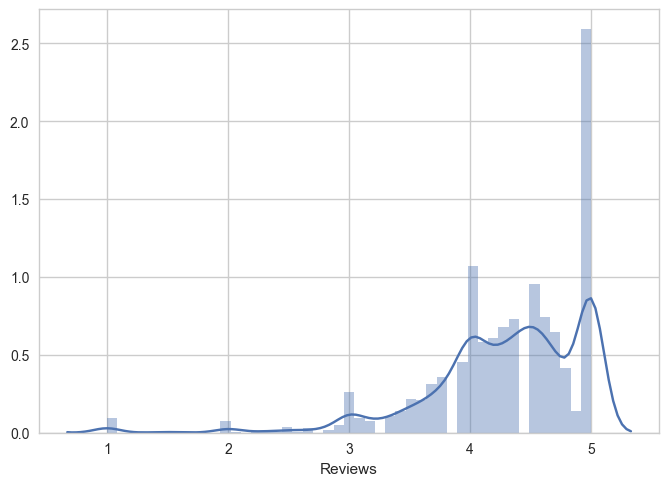

In [153]:
sns.distplot(df['Reviews']);
plt.show()

In [186]:
stemmer = stem.PorterStemmer()
    # Get the list of stop words 
stop_words = stopwords.words('english')
def stem_stop(input_text):

    # Create a Snowball stemmer 
    
    
    # Tokenize the input string
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(input_text.lower())
#     tokens = word_tokenize(input_text.lower())

    # Remove the stop words 
    tokens = [x for x in tokens if not x in stop_words]
    
    # Perform stemming on the tokenized words 
    tokens_stemmed = [stemmer.stem(x) for x in tokens]

    return tokens_stemmed

In [201]:
sentences = list(df['Synopsis'])

In [202]:
sentences = [stem_stop(i) for i in sentences]

In [203]:
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(x)
# print(len(vectorizer.get_feature_names()))

In [204]:
# stem_stop("hey address addresses play-,  playing.!")

In [198]:
model = gensim.models.KeyedVectors.load_word2vec_format('models/GoogleNews-vectors-negative300.bin', binary=True)

In [205]:
for i in sentences

[['hunter',
  'return',
  'third',
  'brilliant',
  'novel',
  'sunday',
  'time',
  'top',
  'ten',
  'bestsel',
  'author',
  'chri',
  'kuzneski',
  'whose',
  'write',
  'jame',
  'patterson',
  'say',
  'raw',
  'power',
  'team',
  'hunt',
  'marco',
  'polo',
  'hidden',
  'treasur',
  'tail',
  'hunter',
  'seek',
  'find',
  'travel',
  'marco',
  'polo',
  'known',
  'throughout',
  'world',
  'stori',
  'complet',
  'greatest',
  'adventur',
  'yet',
  'discov',
  'guid',
  'journal',
  'believ',
  'dictat',
  'polo',
  'hunter',
  'set',
  'search',
  'final',
  'legaci',
  'mythic',
  'treasur',
  'gather',
  'polo',
  'lifetim',
  'explor',
  'everi',
  'ancient',
  'clue',
  'bring',
  'closer',
  'truth',
  'new',
  'step',
  'put',
  'increas',
  'danger',
  'explos',
  'action',
  'killer',
  'charact',
  'classic',
  'kuzneski'],
 ['layer',
  'portrait',
  'troubl',
  'geniu',
  'art',
  'mere',
  'thing',
  'beauti',
  'vital',
  'part',
  'live',
  'sell',
  'point